<a href="https://colab.research.google.com/github/fillipesansilva/Livraria/blob/master/exec3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


O dataset é composto por dados coletados durante 3 meses pela Telecom Italia.

Os dados representam a soma da quantidade do volume de dados trafegados a cada 10 min


In [2]:
import pandas as pd
import numpy as np
from pandas import datetime
from sklearn.feature_extraction import DictVectorizer

def date_parser(x):
	return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

dados = pd.read_csv("/content/drive/My Drive/Colab Notebooks/semana1/grid1.csv", parse_dates=[0], date_parser=date_parser)
dados = dados[:8782] #somente 2 meses
dados.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  import sys


,timestamp,demand
0,2013-11-01 00:10:00,11.127101
1,2013-11-01 00:20:00,10.892771
2,2013-11-01 00:30:00,8.622425
3,2013-11-01 00:40:00,8.009927
4,2013-11-01 00:50:00,8.118420


Tratando os dados.

In [3]:
#month	day	hour	minute demand

dados['new_date'] = [str(d.date()) for d in dados['timestamp']]
dados['new_time'] = [str(d.time()) for d in dados['timestamp']]

dados['month'] = [float(d.split("-")[1]) for d in dados['new_date']]
dados['day'] = [float(d.split("-")[2]) for d in dados['new_date']]
dados['hour'] = [float(d.split(":")[0]) for d in dados['new_time']]
dados['minute'] = [float(d.split(":")[1]) for d in dados['new_time']]

dados['M11'] = [1 if x == 11 else 0 for x in dados['month']]
dados['M12'] = [1 if x == 12 else 0 for x in dados['month']]

dados['D1'] = [1 if x == 1 else 0 for x in dados['day']]                                                                     
dados['D2'] = [1 if x == 2 else 0 for x in dados['day']]                                                                     
dados['D3'] = [1 if x == 3 else 0 for x in dados['day']]                                                                     
dados['D4'] = [1 if x == 4 else 0 for x in dados['day']]                                                                     
dados['D5'] = [1 if x == 5 else 0 for x in dados['day']]                                                                     
dados['D6'] = [1 if x == 6 else 0 for x in dados['day']]                                                                     
dados['D7'] = [1 if x == 7 else 0 for x in dados['day']]                                                                     
dados['D8'] = [1 if x == 8 else 0 for x in dados['day']]                                                                     
dados['D9'] = [1 if x == 9 else 0 for x in dados['day']]                                                                     
dados['D10'] = [1 if x == 10 else 0 for x in dados['day']]                                                                   
dados['D11'] = [1 if x == 11 else 0 for x in dados['day']]                                                                   
dados['D12'] = [1 if x == 12 else 0 for x in dados['day']]                                                                   
dados['D13'] = [1 if x == 13 else 0 for x in dados['day']]                                                                   
dados['D14'] = [1 if x == 14 else 0 for x in dados['day']]                                                                   
dados['D15'] = [1 if x == 15 else 0 for x in dados['day']]                                                                   
dados['D16'] = [1 if x == 16 else 0 for x in dados['day']]                                                                   
dados['D17'] = [1 if x == 17 else 0 for x in dados['day']]                                                                   
dados['D18'] = [1 if x == 18 else 0 for x in dados['day']]                                                                   
dados['D19'] = [1 if x == 19 else 0 for x in dados['day']]                                                                   
dados['D20'] = [1 if x == 20 else 0 for x in dados['day']]                                                                   
dados['D21'] = [1 if x == 21 else 0 for x in dados['day']]                                                                   
dados['D22'] = [1 if x == 22 else 0 for x in dados['day']]                                                                   
dados['D23'] = [1 if x == 23 else 0 for x in dados['day']]                                                                   
dados['D24'] = [1 if x == 24 else 0 for x in dados['day']]                                                                   
dados['D25'] = [1 if x == 25 else 0 for x in dados['day']]                                                                   
dados['D26'] = [1 if x == 26 else 0 for x in dados['day']]                                                                   
dados['D27'] = [1 if x == 27 else 0 for x in dados['day']]                                                                   
dados['D28'] = [1 if x == 28 else 0 for x in dados['day']]                                                                   
dados['D29'] = [1 if x == 29 else 0 for x in dados['day']]                                                                   
dados['D30'] = [1 if x == 30 else 0 for x in dados['day']]                                                                   
dados['D31'] = [1 if x == 31 else 0 for x in dados['day']]

dados['H0'] = [1 if x == 0 else 0 for x in dados['hour']]                 
dados['H1'] = [1 if x == 1 else 0 for x in dados['hour']]                 
dados['H2'] = [1 if x == 2 else 0 for x in dados['hour']]                 
dados['H3'] = [1 if x == 3 else 0 for x in dados['hour']]                 
dados['H4'] = [1 if x == 4 else 0 for x in dados['hour']]                 
dados['H5'] = [1 if x == 5 else 0 for x in dados['hour']]                 
dados['H6'] = [1 if x == 6 else 0 for x in dados['hour']]                 
dados['H7'] = [1 if x == 7 else 0 for x in dados['hour']]                 
dados['H8'] = [1 if x == 8 else 0 for x in dados['hour']]                 
dados['H9'] = [1 if x == 9 else 0 for x in dados['hour']]                 
dados['H10'] = [1 if x == 10 else 0 for x in dados['hour']]               
dados['H11'] = [1 if x == 11 else 0 for x in dados['hour']]               
dados['H12'] = [1 if x == 12 else 0 for x in dados['hour']]               
dados['H13'] = [1 if x == 13 else 0 for x in dados['hour']]               
dados['H14'] = [1 if x == 14 else 0 for x in dados['hour']]               
dados['H15'] = [1 if x == 15 else 0 for x in dados['hour']]               
dados['H16'] = [1 if x == 16 else 0 for x in dados['hour']]               
dados['H17'] = [1 if x == 17 else 0 for x in dados['hour']]               
dados['H18'] = [1 if x == 18 else 0 for x in dados['hour']]               
dados['H19'] = [1 if x == 19 else 0 for x in dados['hour']]               
dados['H20'] = [1 if x == 20 else 0 for x in dados['hour']]               
dados['H21'] = [1 if x == 21 else 0 for x in dados['hour']]               
dados['H22'] = [1 if x == 22 else 0 for x in dados['hour']]               
dados['H23'] = [1 if x == 23 else 0 for x in dados['hour']]

dados['MIN0'] = [1 if x == 0 else 0 for x in dados['minute']]             
dados['MIN10'] = [1 if x == 10 else 0 for x in dados['minute']]           
dados['MIN20'] = [1 if x == 20 else 0 for x in dados['minute']]           
dados['MIN30'] = [1 if x == 30 else 0 for x in dados['minute']]           
dados['MIN40'] = [1 if x == 40 else 0 for x in dados['minute']]           
dados['MIN50'] = [1 if x == 50 else 0 for x in dados['minute']]

dados.to_csv("/content/drive/My Drive/Colab Notebooks/semana1/t.csv", sep='\t')


dados.head()

,timestamp,demand,new_date,new_time,month,day,hour,minute,M11,M12,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,MIN0,MIN10,MIN20,MIN30,MIN40,MIN50
0,2013-11-01 00:10:00,11.127101,2013-11-01,00:10:00,11.0,1.0,0.0,10.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2013-11-01 00:20:00,10.892771,2013-11-01,00:20:00,11.0,1.0,0.0,20.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2013-11-01 00:30:00,8.622425,2013-11-01,00:30:00,11.0,1.0,0.0,30.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2013-11-01 00:40:00,8.009927,2013-11-01,00:40:00,11.0,1.0,0.0,40.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2013-11-01 00:50:00,8.118420,2013-11-01,00:50:00,11.0,1.0,0.0,50.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
dados.dtypes

timestamp    datetime64[ns]
demand              float64
new_date             object
new_time             object
month               float64
                  ...      
MIN10                 int64
MIN20                 int64
MIN30                 int64
MIN40                 int64
MIN50                 int64
Length: 71, dtype: object

In [5]:
n_dados = dados.drop(["timestamp","new_date","new_date","new_time",	"month",	"day",	"hour",	"minute"], axis ="columns")
n_dados

,demand,M11,M12,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,MIN0,MIN10,MIN20,MIN30,MIN40,MIN50
0,11.127101,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,10.892771,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,8.622425,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,8.009927,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,8.118420,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8777,12.245558,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
8778,13.740447,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8779,13.405484,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8780,14.344925,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


Os dados são gerados a cada 10 minutos. 
1.   1 dia temos 144 (dados/linhas)
2.   7 dias = 144*7 = 1008 (dados/linhas)
3.   1 mês = 4032 (dados/linhas)

Volume de tráfego durante 1 semana.

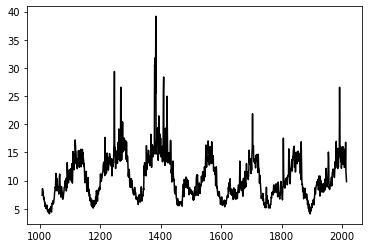

In [6]:
import matplotlib.pyplot as plt, pylab
plt.plot(n_dados["demand"][1008:1008*2], "black")

In [7]:
print(dados[1200:1400])

               timestamp     demand    new_date  ... MIN30  MIN40  MIN50
1200 2013-11-09 08:10:00   9.839963  2013-11-09  ...     0      0      0
1201 2013-11-09 08:20:00  11.164721  2013-11-09  ...     0      0      0
1202 2013-11-09 08:30:00  10.117743  2013-11-09  ...     1      0      0
1203 2013-11-09 08:40:00  10.600151  2013-11-09  ...     0      1      0
1204 2013-11-09 08:50:00   9.869760  2013-11-09  ...     0      0      1
...                  ...        ...         ...  ...   ...    ...    ...
1395 2013-11-10 16:40:00  16.747675  2013-11-10  ...     0      1      0
1396 2013-11-10 16:50:00  14.760007  2013-11-10  ...     0      0      1
1397 2013-11-10 17:00:00  18.281644  2013-11-10  ...     0      0      0
1398 2013-11-10 17:10:00  15.831165  2013-11-10  ...     0      0      0
1399 2013-11-10 17:20:00  15.580697  2013-11-10  ...     0      0      0

[200 rows x 71 columns]


Interessante ...

A rede apresenta 2 padrões.
Um aos sábados e domingos (cheguei a essa conclusão ao plotar a linha 1200 baseado na figura de volumento de tráfego por 1 semana, 2013-11-09 : sábado, 9 de novembro de 2013)
O outro é de seg-sexta.

Vamos tentar capturar esses padrões para predição utilizando MPL.

Volume de tráfego durante 1 mês

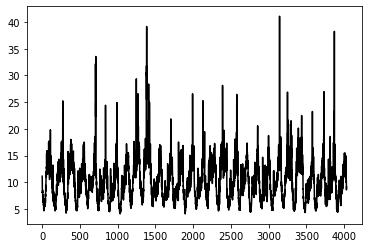

In [8]:
plt.plot(n_dados["demand"][:4032], "black")

### **Treinamento e Predição**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
X = n_dados.drop(["demand"], axis ="columns")
X.head()

,M11,M12,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,MIN0,MIN10,MIN20,MIN30,MIN40,MIN50
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [11]:
y = n_dados.demand
y

0       11.127101
1       10.892771
2        8.622425
3        8.009927
4        8.118420
          ...    
8777    12.245558
8778    13.740447
8779    13.405484
8780    14.344925
8781    12.373551
Name: demand, Length: 8782, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)#random_state=42

Modelagem

In [13]:
regressor = MLPRegressor(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)
regressor.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=100, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [14]:
regressao = regressor.predict(X_test)
regressao

array([11.68101603,  8.05415264, 11.99157415, ..., 10.28263277,
       12.13926066, 12.79662277])

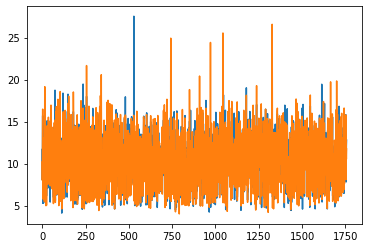

In [15]:
s_regressao = pd.DataFrame(regressao)
y_test.index = s_regressao.index
plt.plot(s_regressao)
plt.plot(y_test)
plt.show()


### **Avaliação do classificador**

In [16]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, explained_variance_score

explained_variance_score = the best possible score is 1.0, lower values are worse

In [17]:
explained_variance_score(y_test, regressao)

0.8204639168675265

In [18]:
max_error(y_test, regressao)

13.155341135681898

In [19]:
mean_absolute_error(y_test, regressao)

0.9623800449789468

In [20]:
mean_squared_error(y_test, regressao)

1.9696745986515893

### **Otimizando parâmetros**

Otimizando RandomizedSearchCV

In [21]:
from sklearn.model_selection import RandomizedSearchCV
import sklearn

param_grid = [
              {
                  'hidden_layer_sizes': [(10),(50),(100),(50,10),(100,50)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'max_iter': [500,1000,2000]
              }
              
]

In [22]:
regression_random = RandomizedSearchCV(MLPRegressor(),param_grid,cv=5,scoring='explained_variance')

In [23]:
regression_random.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                          batch_size='auto', beta_1=0.9,
                                          beta_2=0.999, early_stopping=False,
                                          epsilon=1e-08,
                                          hidden_layer_sizes=(100,),
                                          learning_rate='constant',
                                          learning_rate_init=0.001,
                                          max_fun=15000, max_iter=200,
                                          momentum=0.9, n_iter_no_change=10,
                                          nesterovs_momentum=True, power_t=0.5,
                                          random_...
                                          verbose=False, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{'activation

In [24]:
print(regression_random.best_params_)

{'solver': 'sgd', 'max_iter': 1000, 'hidden_layer_sizes': (100, 50), 'activation': 'tanh'}


In [25]:
print(round(regression_random.best_score_,3))

0.795


Otimizando com Grid Search

In [26]:
regression_grid = GridSearchCV(MLPRegressor(),param_grid,cv=5,scoring='explained_variance')

In [27]:
regression_grid.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=...
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': ['identity', 'logistic', 'tanh',
                                         'r

In [28]:
print(regression_grid.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': 50, 'max_iter': 500, 'solver': 'adam'}


In [29]:
print(regression_grid.best_score_)

0.8060612034741077


### **Avaliação**

Esse dataset é interessante (pelo menos para mim).

Um dos aspectos mais notado é sua sanzonalidade.
Isso é notado a cada 144 "dados" (isso equivale a 1 dia).
Ou seja, a série tende a repetir seu comportamento a cada dia.
Isso deve-se a fato do padrão de mobilidade dos usuários.
Há um grande volume de tráfego de 11 às 14:30, diminuindo ao enoitecer durante a semana. 
Como notado na figura 2, o volume de tráfego se repete de segunda a sexta, com  mudanças no tráfego aos sábados e domingos. 

Ao modelar como MPL, achei que conseguiria uma boa predição.
Os resultados foram ruins. 

Ao pesquisar sobre oque poderia ter acontecido, cheguei a uma conclusão:

Por um lado, as RNAs são utilizadas para resolver problemas que são complexos computacionalmente, pois são efetivas quanto a qualidade dos resultados. Por outro lado, as RNAS não apresentam a capacidade de processar e armazenar informações temporais e sinais sequenciais (notado nesse dataset). Redes Neurais Recorrentes podem **resolver** esse problema através de loops, permitindo que as informações persistam.

O próximo passo será treinar com uma rede LSTM e analisar os resultados.

*Não tenho certeza sobre a modelagem do timestamp, foi o jeito que me veio na cabeça. Talvez exista um jeito mais eficiente.

